In [0]:
# Install geopandas
!pip install geopandas --quiet --no-cache

!wget "https://raw.githubusercontent.com/VaasuDevanS/Edmonton-Safe-Neighbourhood/master/EPS_Neighbourhood_Criminal_Occurrences.csv" -qO "EPS_Criminal_Occurrences.csv"
!wget "https://raw.githubusercontent.com/VaasuDevanS/Edmonton-Safe-Neighbourhood/master/Edmonton_Neighbourhood.zip" -qO "Edmonton_Neighbourhood.zip"
!unzip -qq Edmonton_Neighbourhood.zip && rm Edmonton_Neighbourhood.zip

In [0]:
# Import the modules
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [0]:
# Read the data
crimeDF = pd.read_csv("EPS_Criminal_Occurrences.csv")
neighbourhood = gpd.read_file("Edmonton_Neighbourhood")

# Overview of the data
uniq_nei_hood = crimeDF["Neighbourhood Description (Occurrence)"].unique()
uniq_year = sorted(crimeDF["Occurrence Reported Year"].unique())[:-1]
uniq_crime = crimeDF["Occurrence Violation Type Group"].unique()

print(f"Crime Records: {len(crimeDF)}\n"
      f"Crime Neighbourhoods: {len(uniq_nei_hood)}\n"
      f"SHP Neighbourhoods: {len(neighbourhood)}\n"
      f"Years: {uniq_year}\n"
      f"Types of Crime: \n{uniq_crime}"
     )

Crime Records: 106239
Crime Neighbourhoods: 393
SHP Neighbourhoods: 400
Years: [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Types of Crime: 
['Assault' 'Theft Over $5000' 'Break and Enter' 'Homicide' 'Robbery'
 'Sexual Assaults' 'Theft From Vehicle' 'Theft Of Vehicle']


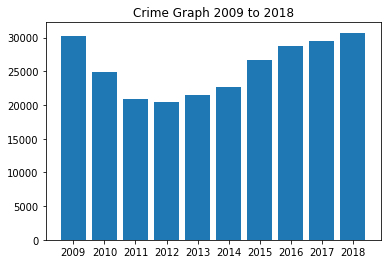

In [0]:
# Simple plot yearwise
year_occ = []
for y in uniq_year:
    cond = (crimeDF["Occurrence Reported Year"] == y)
    year_occ.append(crimeDF[cond]["# Occurrences"].values.sum())

plt.bar(uniq_year, year_occ, align="center")
plt.xticks(uniq_year)
plt.title("Crime Graph 2009 to 2018")
plt.show()

In [0]:
# Get count neighbourhood wise
nei_crime = {}
for n in uniq_nei_hood:
    cond = (crimeDF["Neighbourhood Description (Occurrence)"] == n)
    nei_crime[n] = crimeDF[cond]["# Occurrences"].values.sum()

In [0]:
# Apply upper case in the shapefile dataframe
neighbourhood["name"] = neighbourhood["name"].str.upper()

# Create column with crime count occurrences in the shapefile
for nei, occurrences in nei_crime.items():
    cond = (neighbourhood["name"] == nei)
    neighbourhood.loc[cond, "occurred"] = int(occurrences)
neighbourhood["occurred"] = neighbourhood["occurred"].fillna(0)

# print(neighbourhood[neighbourhood['occurred'].isnull()].to_string())
print(neighbourhood.sort_values("occurred")[["name", "occurred"]].to_string())

# Export to shapefile
neighbourhood.to_file("Edmonton_Neighbourhood_occurrences.shp")

                                       name  occurred
310                         KINGLET GARDENS       0.0
308         ANTHONY HENDAY SOUTH BLACKBURNE       0.0
192                         BLATCHFORD AREA       0.0
363                   CRYSTALLINA NERA EAST       0.0
285                     GLENRIDDING HEIGHTS       0.0
316                                 MARQUIS       0.0
305       WHITEMUD CREEK RAVINE TWIN BROOKS       0.0
317                          DECOTEAU NORTH       0.0
247                  EDMONTON SOUTH CENTRAL       0.0
295                              STILLWATER       0.0
322                     EDMONTON SOUTH EAST       0.0
203              RIVER VALLEY LESSARD NORTH       0.0
282                      GLENRIDDING RAVINE       0.0
324                     EDMONTON SOUTH WEST       0.0
258                ANTHONY HENDAY CLAREVIEW       1.0
340                    RIVER VALLEY CAMERON       1.0
283              ANTHONY HENDAY CASTLEDOWNS       2.0
330                   BLACKM